# Image Transformations 
### - Translation, Rotation, Resizing, Flipping and Cropping

### Import the necessary packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2

%matplotlib inline

# 1. Translation

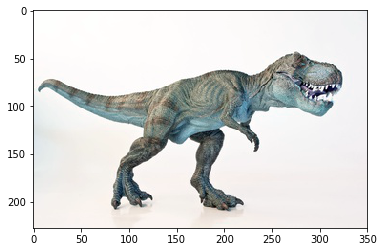

In [2]:
# Load the image and show it
image = cv2.imread("images/image1.jpg")
plt.imshow(image)

NOTE: 

Translating (shifting) an image is given by a NumPy matrix in the form: [[1, 0, shiftX], [0, 1, shiftY]]

You simply need to specify how many pixels you want to shift the image in the X and Y direction.
### Let's translate the image 25 pixels to the right and 50 pixels down

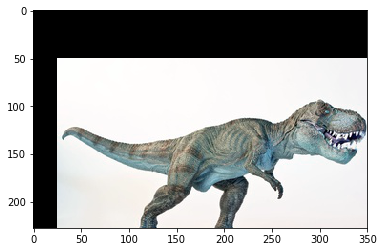

In [3]:
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt.imshow(shifted)

### Now, let's shift the image 50 pixels to the left and 90 pixels up. We accomplish this using negative values

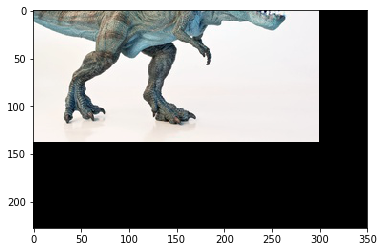

In [4]:
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt.imshow(shifted)

### Finally, let's use our helper function in imutils.py to shift the image down 100 pixels

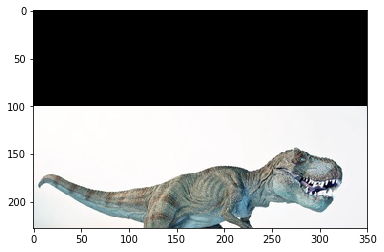

In [5]:
shifted = imutils.translate(image, 0, 100)
plt.imshow(shifted)

# 2. Rotation

### Grab the dimensions of the image and calculate the center of the image

In [6]:
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

### Rotate our image by 45 degrees

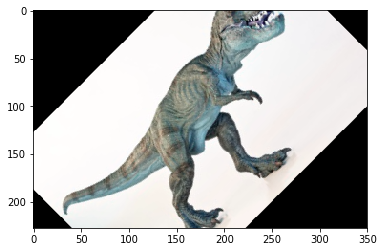

In [7]:
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(rotated)

### Rotate our image by -90 degrees

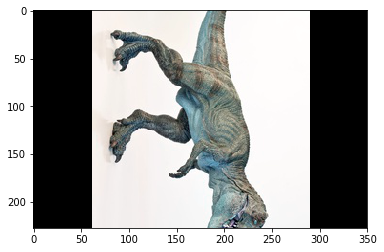

In [8]:
M = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(rotated)

### Finally, let's use our helper function in imutils.py to rotate the image by 180 degrees (flipping it upside down)

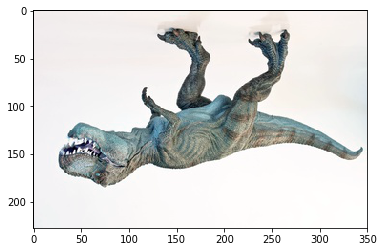

In [9]:
rotated = imutils.rotate(image, 180)
plt.imshow(rotated)

# 3. Resizing

We need to keep in mind aspect ratio so the image does not look skewed or distorted 

-- therefore, we calculate the ratio of the new image to the old image. 
### Let's make our new image have a width of 150 pixels

In [10]:
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))

### Perform the actual resizing of the image

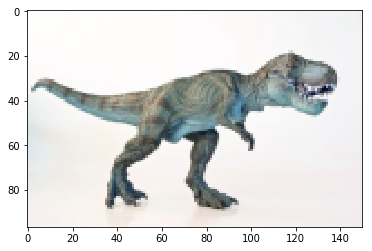

In [11]:
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized)

What if we wanted to adjust the height of the image? 

We apply the same concept, again keeping in mind the aspect ratio, but instead calculating the ratio based on height.
### Let's make the height of the resized image 50 pixels

In [12]:
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

### Perform the resizing

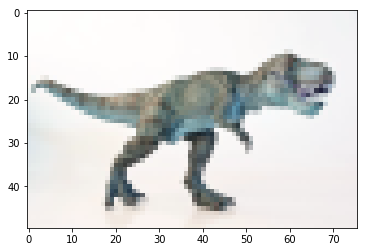

In [13]:
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized)

Of course, calculating the ratio each and every time we want to resize an image is a real pain. 
### Let's create a function where we can specify our target width or height, and have it take care of the rest for us.

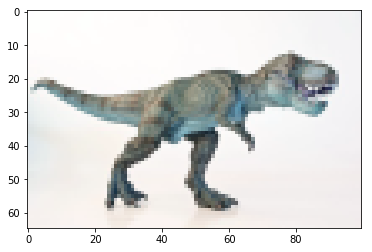

In [14]:
resized = imutils.resize(image, width = 100)
plt.imshow(resized)

# 4. Flipping

### Flip the image horizontally

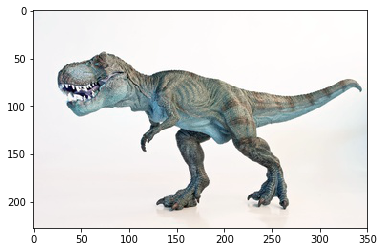

In [15]:
flipped = cv2.flip(image, 1)
plt.imshow(flipped)

### Flip the image vertically

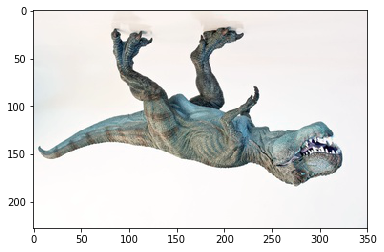

In [16]:
flipped = cv2.flip(image, 0)
plt.imshow(flipped)

### Flip the image along both axes

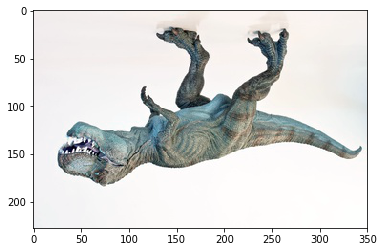

In [17]:
flipped = cv2.flip(image, -1)
plt.imshow(flipped)

# 5. Cropping

Cropping an image is as simple as using array slices in NumPy! 

The order in which we specify the coordinates is: startY:endY, startX:endX

### Let's crop out the face of the T-Rex. 
In this case, we are starting at Y=30 and ending at Y=120. Similarly, we start at X=240 and X=335.

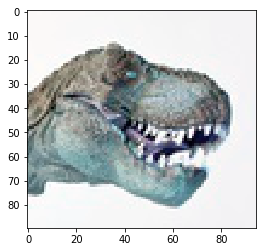

In [18]:
cropped = image[30:120 , 240:335]
plt.imshow(cropped)